# Generate patterns in time series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from badgers.generators.time_series.patterns import RandomConstantPatterns, RandomLinearPatterns
import matplotlib.patches as patches

## Setup random generator

In [2]:
from numpy.random import default_rng
seed = 0
rng = default_rng(seed)

## Import data (using sktime)

In [3]:
from sktime.datasets import load_airline

In [4]:
X = load_airline()
t = X.index.to_timestamp()

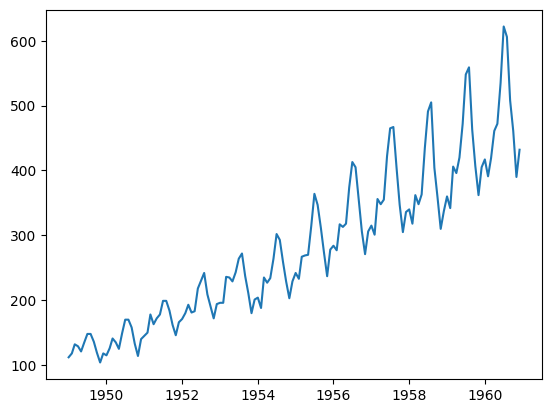

In [5]:
plt.plot(t, X.values)

## Randomly generate patterns (subsequences) with constant values

In [6]:
generator = RandomConstantPatterns(n_patterns=5, patterns_width=5, constant_value=0, random_generator=rng)

In [7]:
Xt, _ = generator.generate(X.copy().values.reshape(-1, 1), None)

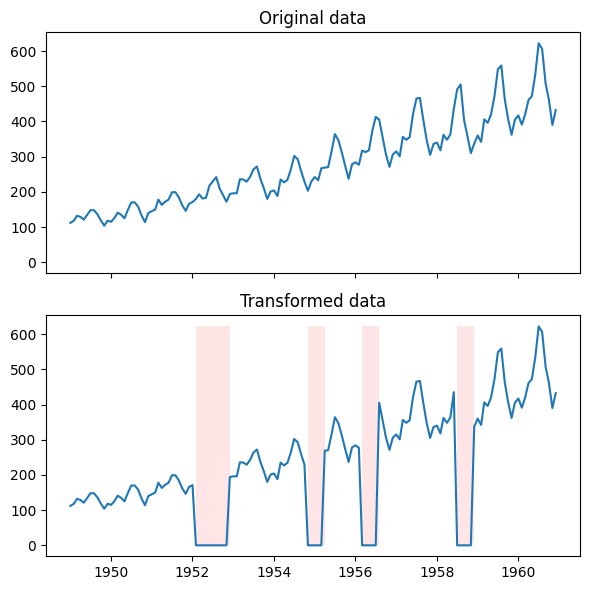

In [8]:
fig, axes = plt.subplots(2, sharex=True, sharey=True, figsize=(6,6))
axes[0].plot(t, X.values)
axes[0].set_title('Original data')
axes[1].plot(t, Xt)
axes[1].set_title('Transformed data')
# show where the patterns are located
bottom = np.min(Xt)
height = np.max(Xt) - np.min(Xt)
for start, end in generator.patterns_indices_:
    width = t[end]-t[start]
    left = t[start]
    rect = plt.Rectangle((left, bottom), width, height,
                         facecolor="red", alpha=0.1)
    axes[1].add_patch(rect)
plt.tight_layout();

## Generate patterns with constant slope (linear)

In [9]:
generator = RandomLinearPatterns(n_patterns=5, patterns_width=5, random_generator=rng)

In [10]:
Xt, _ = generator.generate(X.copy().values.reshape(-1, 1), None)

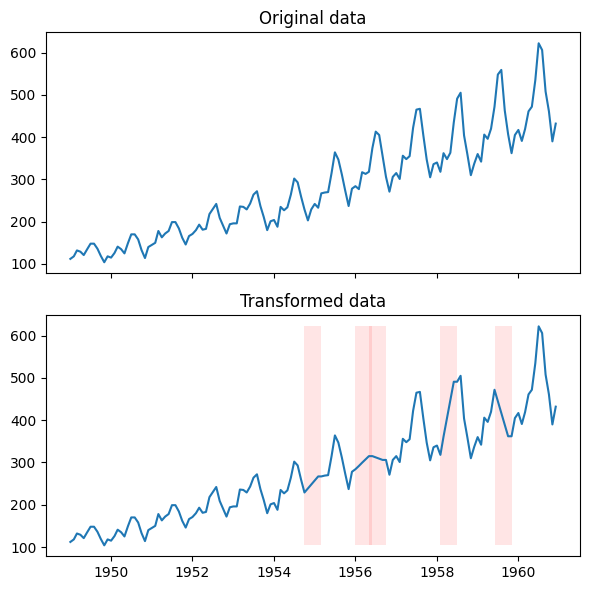

In [11]:
fig, axes = plt.subplots(2, sharex=True, sharey=True, figsize=(6,6))
axes[0].plot(t, X.values)
axes[0].set_title('Original data')
axes[1].plot(t, Xt)
axes[1].set_title('Transformed data')
# show where the patterns are located
bottom = np.min(Xt)
height = np.max(Xt) - np.min(Xt)
for start, end in generator.patterns_indices_:
    width = t[end]-t[start]
    left = t[start]
    rect = plt.Rectangle((left, bottom), width, height,
                         facecolor="red", alpha=0.1)
    axes[1].add_patch(rect)
plt.tight_layout();

## Using the pattern class (beta as of 0.0.6)

Badgers provides a class for implementing specific patterns

In [12]:
from badgers.generators.time_series.patterns import Pattern, add_linear_trend, add_offset, scale

### Defining a pattern

In [13]:
p = Pattern(values=np.array([0,0.25,0.75,1,0.75,0.25,-0.5,-0.75,-0.5,-0.25,-0.1,0]))

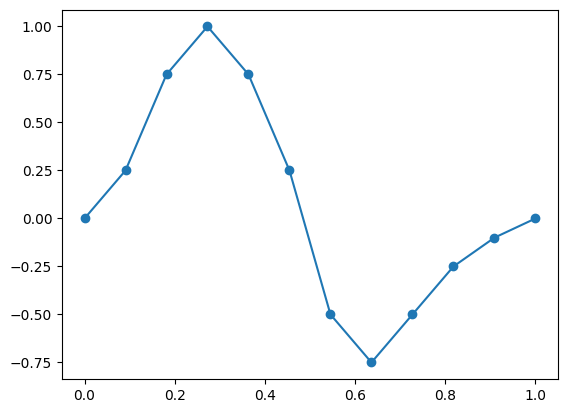

In [14]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,len(p.values)), p.values, 'o', ls='-', color='C0', label='original')

### Resampling a pattern

The Pattern class provides a method for resampling a pattern. It is based on Cubic Spline Interpolation


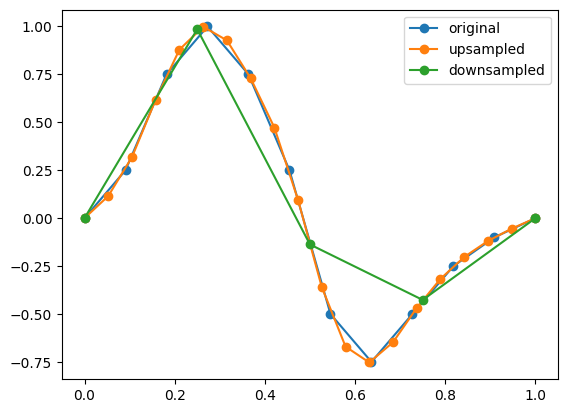

In [15]:
upsampled_pattern = p.resample(nb_point=20)
downsampled_pattern = p.resample(nb_point=5)

fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,len(p.values)), p.values, 'o', ls='-', color='C0', label='original')
ax.plot(np.linspace(0,1,len(upsampled_pattern)), upsampled_pattern, 'o', ls='-', color='C1', label='upsampled')
ax.plot(np.linspace(0,1,len(downsampled_pattern)), downsampled_pattern, 'o', ls='-', color='C2', label='downsampled')
plt.legend()

### Add a linear trend to the pattern

The function `add_linear_trend` takes three arguments: the values to be transformed, a start_value (were the new pattern should start) and end_value (where the new pattern should end)

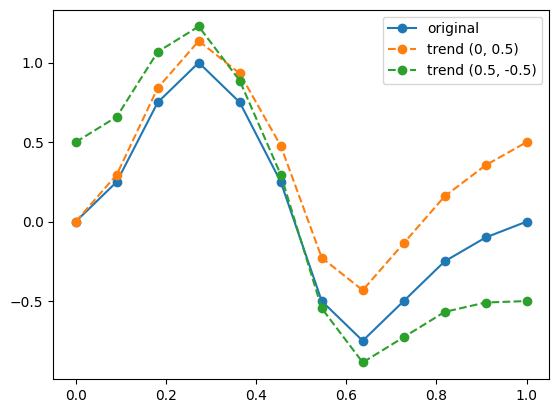

In [16]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,len(p.values)), p.values, 'o', ls='-', color='C0', label='original')

for i, (start, end) in enumerate([(0,0.5),(0.5,-0.5)]):
    ax.plot(np.linspace(0,1,len(p.values)), add_linear_trend(p.values, start_value=start, end_value=end), 'o', ls='--', color=f'C{i+1}', label=f'trend ({start}, {end})')

plt.legend()

### Add an offset (bias) to the pattern

THe function `add_offset` takes two arguments: the values to be transformed and an offset (float or int)

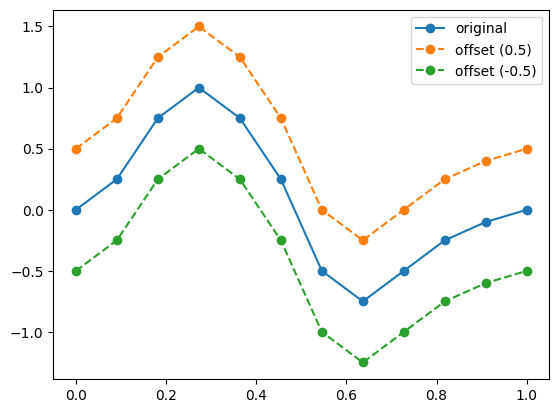

In [17]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,len(p.values)), p.values, 'o', ls='-', color='C0', label='original')

for i, offset in enumerate([0.5,-0.5]):
    ax.plot(np.linspace(0,1,len(p.values)), add_offset(p.values, offset), 'o', ls='--', color=f'C{i+1}', label=f'offset ({offset})')

plt.legend()

### Scale a pattern

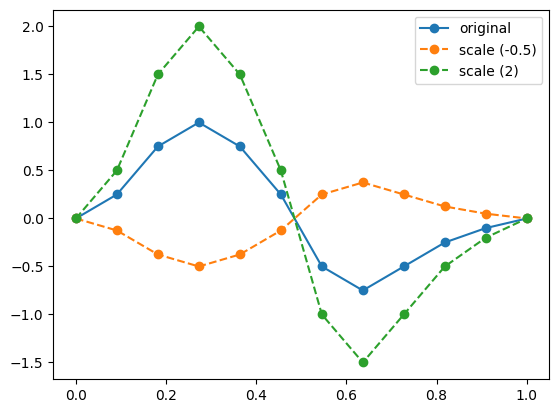

In [18]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,len(p.values)), p.values, 'o', ls='-', color='C0', label='original')

for i, scaling_factor in enumerate([-0.5,2]):
    ax.plot(np.linspace(0,1,len(p.values)), scale(p.values, scaling_factor), 'o', ls='--', color=f'C{i+1}', label=f'scale ({scaling_factor})')

plt.legend()

### Combining different operations

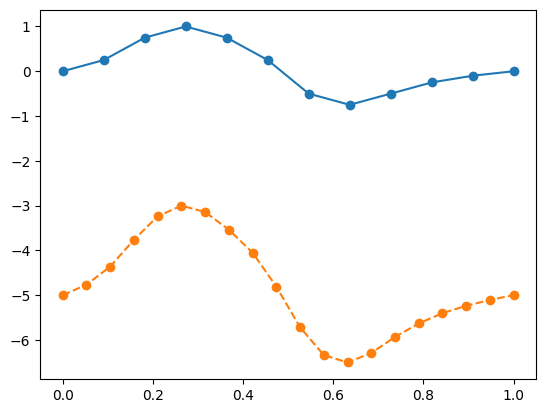

In [19]:
# first resample the pattern (as of version 0.0.6, this might change in the future)

transformed_pattern = add_offset(
    scale(
        p.resample(nb_point=20), 
        scaling_factor=2
    ),
    offset=-5
)


fig, ax = plt.subplots()
ax.plot(np.linspace(0,1,len(p.values)), p.values, 'o', ls='-', color='C0', label='original')
ax.plot(np.linspace(0,1,len(transformed_pattern)), transformed_pattern, 'o', ls='--', color='C1', label='transformed')